In [ ]:
#Importing libraries
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
#Load the dataset
df=pd.read_csv("students performance.csv")
print(df.head())

   Socioeconomic Score  Study Hours  Sleep Hours  Attendance (%)  Grades
0              0.95822          3.4          8.2              53      47
1              0.85566          3.2          5.9              55      35
2              0.68025          3.2          9.3              41      32
3              0.25936          3.2          8.2              47      34
4              0.60447          3.8         10.0              75      33


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Socioeconomic Score  1388 non-null   float64
 1   Study Hours          1388 non-null   float64
 2   Sleep Hours          1388 non-null   float64
 3   Attendance (%)       1388 non-null   int64  
 4   Grades               1388 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 54.3 KB


In [ ]:
df.isnull().sum()

,0
Socioeconomic Score,0
Study Hours,0
Sleep Hours,0
Attendance (%),0
Grades,0


In [ ]:
df.describe()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,0.552274,4.560807,8.047262,58.536023,40.691643
std,0.261272,1.897581,1.370700,11.675287,9.467358
min,0.101280,0.800000,4.800000,40.000000,32.000000
25%,0.322118,3.475000,7.000000,49.000000,34.000000
50%,0.545945,3.900000,8.400000,57.000000,35.000000
75%,0.789610,5.900000,9.100000,66.000000,47.000000
max,0.999820,10.000000,10.000000,100.000000,91.000000


In [ ]:
df.shape

(1388, 5)

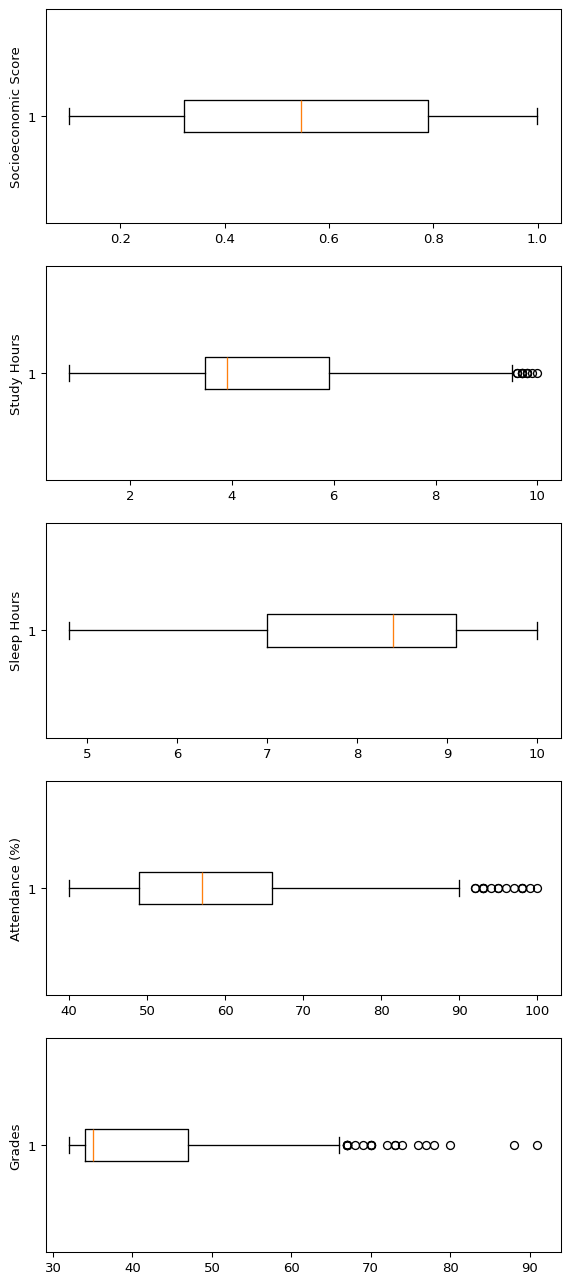

In [ ]:
#Box plots
fig,axs=plt.subplots(len(df.select_dtypes(include=np.number).columns),1,dpi=95,figsize=(7,17)) # Changed this line
i=0
for col in df.select_dtypes(include=np.number).columns: # Select only numeric columns
    axs[i].boxplot(df[col],vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

In [ ]:
#Identify quartiles
q1,q3=np.percentile(df['Socioeconomic Score'],[25,75])
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
#Drop the outliers
clean_data=df[(df['Socioeconomic Score']>=lower_bound)&(df['Socioeconomic Score']<=upper_bound)]

#Identify the quartiles
q1,q3=np.percentile(clean_data['Study Hours'],[25,75])
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
#drop the outliers
clean_data=clean_data[(clean_data['Study Hours']>=lower_bound)&(clean_data['Study Hours']<=upper_bound)]


#Identify the quartiles
q1,q3=np.percentile(clean_data['Sleep Hours'],[25,75])
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
#drop the outliers
clean_data=clean_data[(clean_data['Sleep Hours']>=lower_bound)&(clean_data['Sleep Hours']<=upper_bound)]


#Identify the outliers
q1,q3=np.percentile(clean_data['Attendance (%)'],[25,75])
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
#drop the outliers
clean_data=clean_data[(clean_data['Attendance (%)']>=lower_bound)&(clean_data['Attendance (%)']<=upper_bound)]

#Identify the outliers
q1,q3=np.percentile(clean_data['Grades'],[25,75])
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
#drop the outliers
clean_data=clean_data[(clean_data['Grades']>=lower_bound)&(clean_data['Grades']<=upper_bound)]

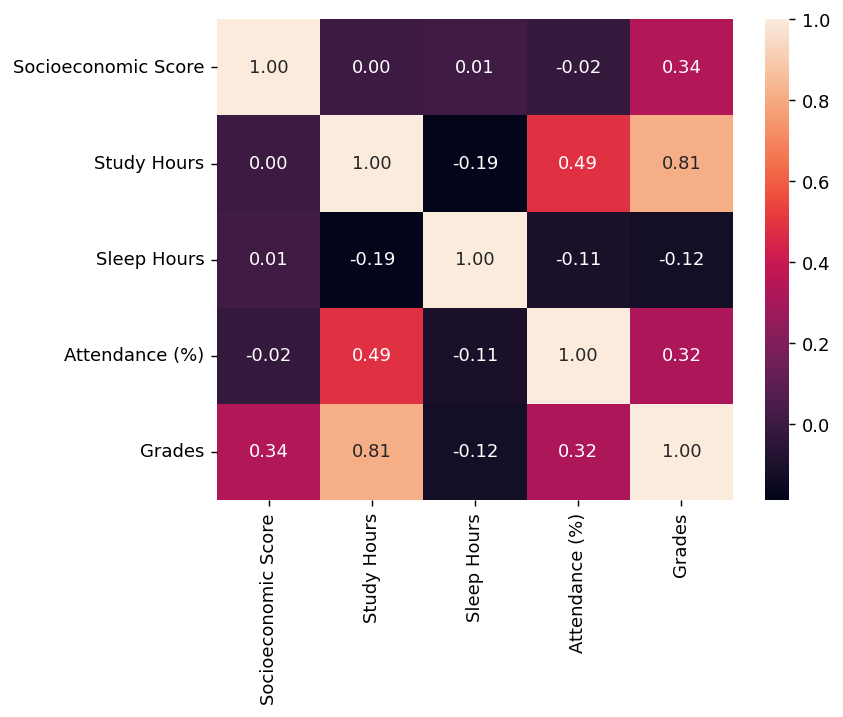

In [ ]:
#correlation
corr=df.corr()
plt.figure(dpi=130)
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

In [ ]:
corr['Grades'].sort_values(ascending=False)

,Grades
Grades,1.000000
Study Hours,0.810807
Socioeconomic Score,0.335033
Attendance (%),0.321930
Sleep Hours,-0.124689


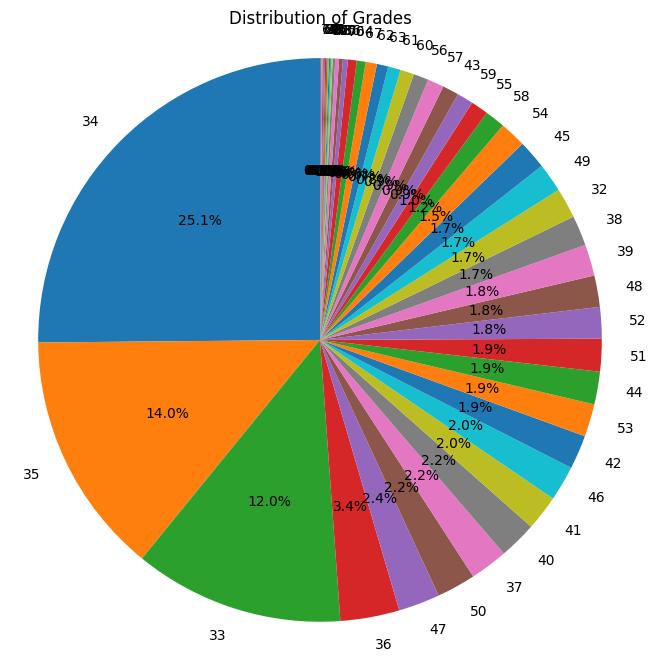

In [ ]:
#Pie chart
plt.figure(figsize=(8, 8))
plt.pie(df['Grades'].value_counts(), labels=df['Grades'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Grades')
plt.axis('equal')
plt.show()

In [ ]:
#Seperate array into input and output components
X=df.drop(columns=['Grades'])
Y=df.Grades

In [ ]:
#initialising the MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
#Learning the statistical parameters for each of the data and transforming
rescaledX=scaler.fit_transform(X)
rescaledX[:5]

array([[0.95370267, 0.2826087 , 0.65384615, 0.21666667],
       [0.83956196, 0.26086957, 0.21153846, 0.25      ],
       [0.64434527, 0.26086957, 0.86538462, 0.01666667],
       [0.17592984, 0.26086957, 0.65384615, 0.11666667],
       [0.56000846, 0.32608696, 1.        , 0.58333333]])

In [ ]:
scaler=StandardScaler().fit(X)
rescaledX=scaler.transform(X)
rescaledX[:5]

array([[ 1.55428769, -0.61195036,  0.11147067, -0.47433681],
       [ 1.16160532, -0.7173857 , -1.5671094 , -0.30297307],
       [ 0.48999443, -0.7173857 ,  0.91426984, -1.50251924],
       [-1.12151182, -0.7173857 ,  0.11147067, -0.98842802],
       [ 0.19984749, -0.40107968,  1.42514203,  1.41066433]])